In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def make_lightcurve(plotname):
    red_points = plotname['fid']==2
    green_points = plotname['fid']==1
    plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
    plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
    plt.xlabel("Days")
    plt.ylabel("Magnitude")
    plt.gca().invert_yaxis()

def make_lightcurve_withnd(plotname, non_detection):
    red_points = plotname['fid']==2
    green_points = plotname['fid']==1
    plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
    plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')

    nd_red_points = non_detection['fid']==2
    nd_green_points = non_detection['fid']==1
    plt.errorbar(non_detection['mjd'][nd_red_points]-plotname['mjd'][0], non_detection['diffmaglim'][nd_red_points], c='red', fmt='v')
    plt.errorbar(non_detection['mjd'][nd_green_points]-plotname['mjd'][0], non_detection['diffmaglim'][nd_green_points], c='green', fmt='v')
    plt.xlabel("Days")
    plt.ylabel("Magnitude")
    plt.gca().invert_yaxis()    

In [3]:
def include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals):
    y_vals = np.array(y_vals)
    x_vals = np.array(x_vals)
    nd_y_vals = np.array(nd_y_vals)
    nd_x_vals = np.array(nd_x_vals)

    nd_x_before_peak = nd_x_vals[nd_x_vals<x_vals[0]][-1]
    nd_y_before_peak = nd_y_vals[nd_x_vals<x_vals[0]][-1]
    x_vals = np.append(x_vals, nd_x_before_peak)
    y_vals = np.append(y_vals, nd_y_before_peak)
    
    order = np.argsort(x_vals)
    zero = [0.0001]
    y_error = np.append(y_error, zero)
    
    return x_vals[order], y_vals[order], y_error[order]

In [4]:
starts = {}
ends = {}
starts['ZTF19abppewc'] = 0
starts['ZTF20abzcokk'] = 0
starts['ZTF21acaohjl'] = 0
starts['ZTF20aawbodq'] = 1
starts['ZTF19achbhfc'] = 0
starts['ZTF19abzipjc'] = 0
starts['ZTF19abyrano'] = 0
starts['ZTF22aahnvmo'] = 0
starts['ZTF22aakzsrj'] = 0
starts['ZTF21accyuff'] = 0
starts['ZTF21aazmjby'] = 0
starts['ZTF18absnibc'] = 0
starts['ZTF20aavtaib'] = 0
starts['ZTF21acgrero'] = 0
starts['ZTF18abrxrms'] = 0
starts['ZTF18abvkwla'] = 0
starts['ZTF18abcfcoo'] = 0
starts['ZTF20acigmel'] = 0
starts['ZTF20abfhyil'] = 0
ends['ZTF19abppewc'] = 50
ends['ZTF20abzcokk'] = 50
ends['ZTF21acaohjl'] = 50
ends['ZTF20aawbodq'] = 50
ends['ZTF19achbhfc'] = 50
ends['ZTF19abzipjc'] = 50
ends['ZTF19abyrano'] = 100
ends['ZTF22aahnvmo'] = 50
ends['ZTF22aakzsrj'] = 50
ends['ZTF21accyuff'] = 10
ends['ZTF21aazmjby'] = 50
ends['ZTF18absnibc'] = 8
ends['ZTF20aavtaib'] = 50
ends['ZTF21acgrero'] = 50
ends['ZTF18abrxrms'] = 50
ends['ZTF18abvkwla'] = 50
ends['ZTF18abcfcoo'] = 50
ends['ZTF20acigmel'] = 50
ends['ZTF20abfhyil'] = 50

In [5]:
def find_averages(x_vals, flux_vals, y_error):
    groupings = x_vals.astype(int)
    flux_averages = []
    time_averages = []
    for i in np.unique(groupings):
        choose = groupings==i
        x = x_vals[choose]
        y = flux_vals[choose]
        y_err = y_error[choose]
    
        weights = 1/y_err**2
        average = (np.sum(weights*y))/(np.sum(weights))
    
        flux_averages.append(average)
        time_averages.append(np.average(x))
    

    flux_averages = np.array(flux_averages)
    return flux_averages, time_averages

In [6]:
def find_derivative(x_vals, y_vals):
    slope = []
    for i in range(len(y_vals)-1):
        values = (y_vals[i+1]-y_vals[i])/(x_vals[i+1]-x_vals[i])
        slope.append(values)

    time = []
    for i in range(len(x_vals)-1):
        xvalues = (x_vals[i]+x_vals[i+1])/2
        time.append(xvalues)

    return slope, time

In [7]:
def plot_bothfilters(plotname, objectname):
    # red filter plot
    # defining red points
    red_points = plotname['fid']==2
    x_vals = plotname['mjd'][red_points].values-plotname['mjd'][0]
    y_vals = plotname['magpsf'][red_points].values
    x_vals = x_vals[starts[objectname]:ends[objectname]]
    y_vals = y_vals[starts[objectname]:ends[objectname]]
    y_error = y_error = plotname['sigmapsf'][red_points]
    y_error = y_error[starts[objectname]:ends[objectname]]
    y_error = np.array(y_error)
    
    # convert magnitude into flux
    flux_values_red = 10**((y_vals+48.60)/-2.5)
    
    # find weighted average of magnitude per day (binning)
    flux_averages_red, time_averages_red = find_averages(x_vals, flux_values_red, y_error)
    
    # convert binned flux points back to magnitude
    mag_values_red = -2.5*np.log10(flux_averages_red)-48.60
    
    # find slope of binned light curve
    slope, time = find_derivative(time_averages_red, mag_values_red)
    
    # plot rate of change of magnitude over time 
    plt.figure(dpi=150)
    ax1 = plt.subplot(2,1,1)
    ax1.plot(time, slope, marker='o', color='red')
    
    # Adding text to plot
    ax1.set_xlabel("Days")
    ax1.set_ylabel(f'Rate of Change in Magnitude \n red filter')
    
    plt.title(objectname)
    
    #green filter plot
    # defining green points
    green_points = plotname['fid']==1
    x_vals = plotname['mjd'][green_points].values-plotname['mjd'][0]
    y_vals = plotname['magpsf'][green_points].values
    x_vals = x_vals[starts[objectname]:ends[objectname]]
    y_vals = y_vals[starts[objectname]:ends[objectname]]
    y_error = y_error = plotname['sigmapsf'][green_points]
    y_error = y_error[starts[objectname]:ends[objectname]]
    y_error = np.array(y_error)
    
    # convert magnitude into flux
    flux_values_green = 10**((y_vals+48.60)/-2.5)
    
    # find weighted average of magnitude per day (binning)
    flux_averages_green, time_averages_green = find_averages(x_vals, flux_values_green, y_error)
    
    # convert binned flux points back to magnitude
    mag_values_green = -2.5*np.log10(flux_averages_green)-48.60
    
    # find slope of binned light curve
    slope, time = find_derivative(time_averages_green, mag_values_green)
    
    
    # plot rate of change of magnitude over time 
    plt.figure(dpi=150)
    ax2 = plt.subplot(2,1,2)
    ax2.plot(time, slope, marker='o', color='green')
    
    # Adding text to plot
    ax2.set_xlabel("Days")
    ax2.set_ylabel(f'Rate of Change in Magnitude \n green filter')
    
     #formatting axes
    ax1.get_shared_x_axes().join(ax1,ax2)
    ax1.get_shared_y_axes().join(ax1,ax2)
    

In [8]:
def plot_withnd(plotname, objectname):
    # red filter plot
    # defining red points
    red_points = plotname['fid']==2
    
    x_vals = plotname['mjd'][red_points].values-plotname['mjd'][0]
    y_vals = plotname['magpsf'][red_points].values
    y_error = y_error = plotname['sigmapsf'][red_points]
    y_error = y_error[starts[objectname]:ends[objectname]]
    y_error = np.array(y_error)
    
    # including last non-detection before first detection
    nd_red_points = non_detection['fid']==2
    nd_x_vals = non_detection['mjd'][nd_red_points]-plotname['mjd'][0]
    nd_y_vals = non_detection['diffmaglim'][nd_red_points]
    
    x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)
    
    x_vals = x_vals[starts[objectname]:ends[objectname]]
    y_vals = y_vals[starts[objectname]:ends[objectname]]
    # convert magnitude into flux
    flux_values_red = 10**((y_sorted+48.60)/-2.5)
    
    # find weighted average of magnitude per day (binning)
    flux_averages_red, time_averages_red = find_averages(x_sorted, flux_values_red, y_error_sorted)
    
    # convert binned flux points back to magnitude
    mag_values_red = -2.5*np.log10(flux_averages_red)-48.60
    
    # find slope of binned light curve
    slope, time = find_derivative(time_averages_red, mag_values_red)
    
    avgslope = np.average(slope)
    avgslope = round(avgslope, 4)
    maxslope = np.max(slope)
    maxslope = round(maxslope, 4)
    # plot rate of change of magnitude over time 
    plt.figure(dpi=150)
    ax1 = plt.subplot(2,1,1)
    ax1.plot(time, slope, marker='o', color='red')
    
    # Adding text to plot
    ax1.set_xlabel("Days")
    ax1.set_ylabel(f'Rate of Change in Magnitude \n red filter')
    textstr = f'peak change: {maxslope} \n average rate: {avgslope}'
    ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)

    plt.title(objectname)
    
    #green filter plot
    # defining green points
    green_points = plotname['fid']==1
    x_vals = plotname['mjd'][green_points].values-plotname['mjd'][0]
    y_vals = plotname['magpsf'][green_points].values
    x_vals = x_vals[starts[objectname]:ends[objectname]]
    y_vals = y_vals[starts[objectname]:ends[objectname]]
    y_error = y_error = plotname['sigmapsf'][green_points]
    y_error = y_error[starts[objectname]:ends[objectname]]
    y_error = np.array(y_error)
    
    # including last non-detection before first detection
    nd_green_points = non_detection['fid']==1
    nd_x_vals = non_detection['mjd'][nd_green_points]-plotname['mjd'][0]
    nd_y_vals = non_detection['diffmaglim'][nd_green_points]
    
    x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)
    
    # convert magnitude into flux
    flux_values_green = 10**((y_sorted+48.60)/-2.5)
    
    # find weighted average of magnitude per day (binning)
    flux_averages_green, time_averages_green = find_averages(x_sorted, flux_values_green, y_error_sorted)
    
    # convert binned flux points back to magnitude
    mag_values_green = -2.5*np.log10(flux_averages_green)-48.60
    
    # find slope of binned light curve
    slope, time = find_derivative(time_averages_green, mag_values_green)
    
    avgslope = np.average(slope)
    avgslope = round(avgslope, 4)
    maxslope = np.max(slope)
    maxslope = round(maxslope, 4)
    # plot rate of change of magnitude over time 
    plt.figure(dpi=150)
    ax2 = plt.subplot(2,1,2)
    ax2.plot(time, slope, marker='o', color='green')
    
    # Adding text to plot
    ax2.set_xlabel("Days")
    ax2.set_ylabel(f'Rate of Change in Magnitude \n green filter')
    textstr = f'peak change: {maxslope} \n average rate: {avgslope}'
    ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)
    
     #formatting axes
    ax1.get_shared_x_axes().join(ax1,ax2)
    ax1.get_shared_y_axes().join(ax1,ax2)
    plt.show()

In [9]:
def plot_on_top_red(plotname, objectname):
    #print("running the plot on top function")
    
    # defining red points
    red_points = plotname['fid']==2
    x_vals = plotname['mjd'][red_points].values-plotname['mjd'][0]
    y_vals = plotname['magpsf'][red_points].values
    #print(objectname)
    #print(starts[objectname])
    #print(ends[objectname])
    x_vals = x_vals[starts[objectname]:ends[objectname]]
    y_vals = y_vals[starts[objectname]:ends[objectname]]
    y_error = y_error = plotname['sigmapsf'][red_points]
    y_error = y_error[starts[objectname]:ends[objectname]]
    y_error = np.array(y_error)
    
    # convert magnitude into flux
    flux_values_red = 10**((y_vals+48.60)/-2.5)
    
    # find weighted average of magnitude per day (binning)
    flux_averages_red, time_averages_red = find_averages(x_vals, flux_values_red, y_error)
    
    # convert binned flux points back to magnitude
    mag_values_red = -2.5*np.log10(flux_averages_red)-48.60
    
    # find slope of binned light curve
    slope, time = find_derivative(time_averages_red, mag_values_red)
    
    return slope, time

def plot_on_top_green(plotname, objectname):
    # defining green points
    green_points = plotname['fid']==1
    x_vals = plotname['mjd'][green_points].values-plotname['mjd'][0]
    y_vals = plotname['magpsf'][green_points].values
    x_vals = x_vals[starts[objectname]:ends[objectname]]
    y_vals = y_vals[starts[objectname]:ends[objectname]]
    y_error = y_error = plotname['sigmapsf'][green_points]
    y_error = y_error[starts[objectname]:ends[objectname]]
    y_error = np.array(y_error)
    
    # convert magnitude into flux
    flux_values_green = 10**((y_vals+48.60)/-2.5)
    
    # find weighted average of magnitude per day (binning)
    flux_averages_green, time_averages_green = find_averages(x_vals, flux_values_green, y_error)
    
    # convert binned flux points back to magnitude
    mag_values_green = -2.5*np.log10(flux_averages_green)-48.60
    
    # find slope of binned light curve
    slope, time = find_derivative(time_averages_green, mag_values_green)
    
    return slope, time

In [10]:
def plot_on_top_rednd(plotname, objectname, non_detection):
    # red filter plot
    # defining red points
    red_points = plotname['fid']==2
    
    x_vals = plotname['mjd'][red_points].values-plotname['mjd'][0]
    y_vals = plotname['magpsf'][red_points].values
    y_error = y_error = plotname['sigmapsf'][red_points]
    y_error = y_error[starts[objectname]:ends[objectname]]
    y_error = np.array(y_error)
    
    # including last non-detection before first detection
    nd_red_points = non_detection['fid']==2
    nd_x_vals = non_detection['mjd'][nd_red_points]-plotname['mjd'][0]
    nd_y_vals = non_detection['diffmaglim'][nd_red_points]
    
    x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)
    
    x_vals = x_vals[starts[objectname]:ends[objectname]]
    y_vals = y_vals[starts[objectname]:ends[objectname]]
    # convert magnitude into flux
    flux_values_red = 10**((y_sorted+48.60)/-2.5)
    
    # find weighted average of magnitude per day (binning)
    flux_averages_red, time_averages_red = find_averages(x_sorted, flux_values_red, y_error_sorted)
    
    # convert binned flux points back to magnitude
    mag_values_red = -2.5*np.log10(flux_averages_red)-48.60
    
    # find slope of binned light curve
    slope, time = find_derivative(time_averages_red, mag_values_red)
    
    return slope, time

def plot_on_top_greennd(plotname, objectname, non_detection):
    #green filter plot
    # defining green points
    green_points = plotname['fid']==1
    x_vals = plotname['mjd'][green_points].values-plotname['mjd'][0]
    y_vals = plotname['magpsf'][green_points].values
    y_error = y_error = plotname['sigmapsf'][green_points]
    y_error = y_error[starts[objectname]:ends[objectname]]
    y_error = np.array(y_error)
    
    # including last non-detection before first detection
    nd_green_points = non_detection['fid']==1
    nd_x_vals = non_detection['mjd'][nd_green_points]-plotname['mjd'][0]
    nd_y_vals = non_detection['diffmaglim'][nd_green_points]
    
    x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)
    
    x_vals = x_vals[starts[objectname]:ends[objectname]]
    y_vals = y_vals[starts[objectname]:ends[objectname]]
    # convert magnitude into flux
    flux_values_green = 10**((y_sorted+48.60)/-2.5)
    
    # find weighted average of magnitude per day (binning)
    flux_averages_green, time_averages_green = find_averages(x_sorted, flux_values_green, y_error_sorted)
    
    # convert binned flux points back to magnitude
    mag_values_green = -2.5*np.log10(flux_averages_green)-48.60
    
    # find slope of binned light curve
    slope, time = find_derivative(time_averages_green, mag_values_green)
    
    return slope, time

In [11]:
def plot_rednd_FBOT(plotname, objectname, non_detection):
    # red filter plot
    # defining red points
    red_points = plotname['Filter']=='r'
    
    x_vals = plotname['Date'][red_points].values-plotname['Date'][0]
    y_vals = plotname['Mag'][red_points].values
    y_error = y_error = plotname['Mag_err'][red_points]
    y_error = y_error[starts[objectname]:ends[objectname]]
    y_error = np.array(y_error)
    
    # including last non-detection before first detection
    nd_red_points = non_detection['Filter']=='r'
    nd_x_vals = non_detection['Date'][nd_red_points]-plotname['Date'][0]
    nd_y_vals = non_detection['Mag'][nd_red_points]
    
    x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)
    
    x_vals = x_vals[starts[objectname]:ends[objectname]]
    y_vals = y_vals[starts[objectname]:ends[objectname]]
    # convert magnitude into flux
    flux_values_red = 10**((y_sorted+48.60)/-2.5)
    
    # find weighted average of magnitude per day (binning)
    flux_averages_red, time_averages_red = find_averages(x_sorted, flux_values_red, y_error_sorted)
    
    # convert binned flux points back to magnitude
    mag_values_red = -2.5*np.log10(flux_averages_red)-48.60
    
    # find slope of binned light curve
    slope, time = find_derivative(time_averages_red, mag_values_red)
    return slope, time 

def plot_greennd_FBOT(plotname, objectname, non_detection):
    # green filter plot
    # defining green points
    green_points = plotname['Filter']=='g'
    
    x_vals = plotname['Date'][green_points].values-plotname['Date'][0]
    y_vals = plotname['Mag'][green_points].values
    y_error = y_error = plotname['Mag_err'][green_points]
    y_error = y_error[starts[objectname]:ends[objectname]]
    y_error = np.array(y_error)
    
    # including last non-detection before first detection
    nd_green_points = non_detection['Filter']=='g'
    nd_x_vals = non_detection['Date'][nd_green_points]-plotname['Date'][0]
    nd_y_vals = non_detection['Mag'][nd_green_points]
    
    x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)
    
    x_vals = x_vals[starts[objectname]:ends[objectname]]
    y_vals = y_vals[starts[objectname]:ends[objectname]]
    # convert magnitude into flux
    flux_values_green = 10**((y_sorted+48.60)/-2.5)
    
    # find weighted average of magnitude per day (binning)
    flux_averages_green, time_averages_green = find_averages(x_sorted, flux_values_green, y_error_sorted)
    
    # convert binned flux points back to magnitude
    mag_values_green = -2.5*np.log10(flux_averages_green)-48.60
    
    # find slope of binned light curve
    slope, time = find_derivative(time_averages_green, mag_values_green)
    return slope, time 


In [12]:
def plot_FBOT_red(plotname, objectname):
    # red filter plot
    # defining red points
    red_points = plotname['Filter']=='r'
    
    x_vals = plotname['Date'][red_points].values-plotname['Date'][0]
    y_vals = plotname['Mag'][red_points].values
    y_error = y_error = plotname['Mag_err'][red_points]
    y_error = y_error[starts[objectname]:ends[objectname]]
    y_error = np.array(y_error)
    
    # convert magnitude into flux
    flux_values_red = 10**((y_vals+48.60)/-2.5)
    
    # find weighted average of magnitude per day (binning)
    flux_averages_red, time_averages_red = find_averages(x_vals, flux_values_red, y_error)
    
    # convert binned flux points back to magnitude
    mag_values_red = -2.5*np.log10(flux_averages_red)-48.60
    
    # find slope of binned light curve
    slope, time = find_derivative(time_averages_red, mag_values_red)
    
    return slope, time

def plot_FBOT_green(plotname, objectname):
    #green filter plot
    # defining green points
    green_points = plotname['Filter']=='g'
    
    x_vals = plotname['Date'][green_points].values-plotname['Date'][0]
    y_vals = plotname['Mag'][green_points].values
    y_error = y_error = plotname['Mag_err'][green_points]
    y_error = y_error[starts[objectname]:ends[objectname]]
    y_error = np.array(y_error)
    
    # convert magnitude into flux
    flux_values_green = 10**((y_vals+48.60)/-2.5)
    
    # find weighted average of magnitude per day (binning)
    flux_averages_green, time_averages_green = find_averages(x_vals, flux_values_green, y_error)
    
    # convert binned flux points back to magnitude
    mag_values_green = -2.5*np.log10(flux_averages_green)-48.60
    
    # find slope of binned light curve
    slope, time = find_derivative(time_averages_green, mag_values_green)
    
    return slope, time

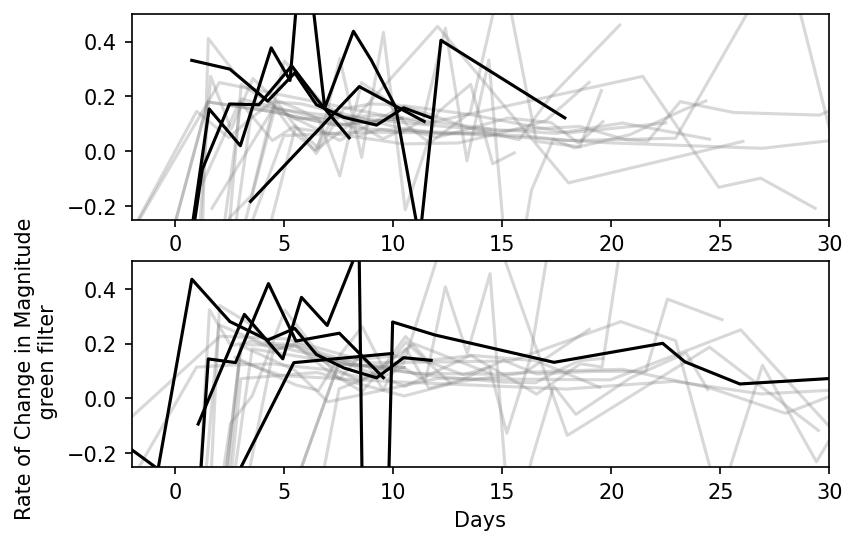

In [25]:
import glob
cv_names = ['ZTF19abppewc', 'ZTF20abzcokk', 'ZTF21acaohjl', 'ZTF20aawbodq', 'ZTF19achbhfc', 'ZTF19abzipjc', 'ZTF19abyrano', 'ZTF22aahnvmo', 'ZTF22aakzsrj', 'ZTF21accyuff', 'ZTF21aazmjby', 'ZTF18absnibc', 'ZTF20aavtaib', 'ZTF21acgrero', 'ZTF18abrxrms', 'ZTF18abrxrms']

plt.figure(dpi=150 )    
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2)

for objectname in cv_names:


    # Find the non-detections
    nd_data_file = glob.glob("C:\\Users\\marya\\Downloads\\%s_2022*\\non_detections_%s.csv" %(objectname,objectname))
    if len(nd_data_file) > 0:
        data_file = glob.glob("C:\\Users\\marya\\Downloads\\%s_2022*\\detections_%s.csv" %(objectname,objectname))[0]
        cv_data = pd.read_csv(data_file)
        nd_cv_data = pd.read_csv(nd_data_file[0])
        slope_r, time_r = plot_on_top_rednd(cv_data, objectname, nd_cv_data)
        ax1.plot(time_r, slope_r, color='grey', alpha=0.3)
        slope_g, time_g = plot_on_top_greennd(cv_data, objectname, nd_cv_data)
        ax2.plot(time_g, slope_g, color='grey', alpha=0.3)
    
    # Find the detections
    else: 
        data_file = glob.glob("C:\\Users\\marya\\Downloads\\%s_2022*\\detections_%s.csv" %(objectname,objectname))[0]
        cv_data = pd.read_csv(data_file)
        slope_r, time_r = plot_on_top_red(cv_data, objectname)
        ax1.plot(time_r, slope_r, color='grey', alpha=0.3)
        slope_g, time_g = plot_on_top_green(cv_data, objectname)
        ax2.plot(time_g, slope_g, color='grey', alpha=0.3)     

        
trans_names = ['ZTF18abvkwla', 'ZTF18abcfcoo', 'ZTF20acigmel']      

for objectname in trans_names:
    nd_data_file = glob.glob("C:\\Users\\marya\\Downloads\\%s non detections - Sheet1.csv" %(objectname))
    if len(nd_data_file) > 0:
        data_file = glob.glob("C:\\Users\\marya\\Downloads\\%s detections - Sheet1.csv" %(objectname))[0]
        cv_data = pd.read_csv(data_file)
        nd_cv_data = pd.read_csv(nd_data_file[0])
        slope_r, time_r = plot_rednd_FBOT(cv_data, objectname, nd_cv_data)
        ax1.plot(time_r, slope_r, color='black')
        slope_g, time_g = plot_greennd_FBOT(cv_data, objectname, nd_cv_data)
        ax2.plot(time_g, slope_g, color='black')
    
    # Find the detections
    else: 
        data_file = glob.glob("C:\\Users\\marya\\Downloads\\%s detections - Sheet1.csv" %(objectname))[0]
        cv_data = pd.read_csv(data_file)
        slope_r, time_r = plot_FBOT_red(cv_data, objectname)
        ax1.plot(time_r, slope_r, color='black')
        slope_g, time_g = plot_FBOT_green(cv_data, objectname)
        ax2.plot(time_g, slope_g, color='black') 

ET_4 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF20abfhyil_20220606\\detections_ZTF20abfhyil.csv")
ND_4 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF20abfhyil_20220606\\non_detections_ZTF20abfhyil.csv")
non_detection_abf = ND_4
plotname_abf = ET_4
objectname_abf = 'ZTF20abfhyil'
slope_abf, time_abf = plot_on_top_rednd(plotname_abf, objectname_abf, non_detection_abf)
ax1.plot(time_abf, slope_abf, color='black')

slope_abf, time_abf = plot_on_top_greennd(plotname_abf, objectname_abf, non_detection_abf)
ax2.plot(time_abf, slope_abf, color='black')
        

# Adding text to plot

ax2.set_xlabel("Days")
ax2.set_ylabel(f'Rate of Change in Magnitude \n green filter')
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)

ax1.set_ylim(-0.25, 0.5)
ax1.set_xlim(-2, 30)

plt.show()

In [14]:
abv_detections = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF18abvkwla detections - Sheet1.csv")
abv_nd = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF18abvkwla non detections - Sheet1.csv")
plotname_abv = abv_detections
non_detection_abv = abv_nd
objectname_abv = 'ZTF18abvkwla'

abc_detections = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF18abcfcoo detections - Sheet1.csv")
plotname_abc = abc_detections
objectname_abc = 'ZTF18abcfcoo'

aci_detections = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF20acigmel detections - Sheet1.csv")
plotname_aci = aci_detections
objectname_aci = 'ZTF20acigmel'

ET_4 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF20abfhyil_20220606\\detections_ZTF20abfhyil.csv")
ND_4 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF20abfhyil_20220606\\non_detections_ZTF20abfhyil.csv")
non_detection_abf = ND_4
plotname_abf = ET_4
objectname_abf = 'ZTF20abfhyil'

slope_abv, time_abv = plot_rednd_FBOT(plotname_abv, objectname_abv, non_detection_abv)
slope_abc, time_abc = plot_FBOT_red(plotname_abc, objectname_abc)
slope_aci, time_aci = plot_FBOT_red(plotname_aci, objectname_aci)
slope_abf, time_abf = plot_on_top_rednd(plotname_abf, objectname_abf, non_detection_abf)

# Adding text to plot
ax1.set_xlabel("Days")
ax1.set_ylabel(f'Rate of Change in Magnitude \n red filter')


# green filter plots

slope_1, time_1 = plot_on_top_green(plotname_1, objectname_1)
slope_4, time_4 = plot_on_top_green(plotname_4, objectname_4)    
slope_5, time_5 = plot_on_top_green(plotname_5, objectname_5)
slope_7, time_7 = plot_on_top_green(plotname_7, objectname_7) 
slope_8, time_8 = plot_on_top_green(plotname_8, objectname_8) 
slope_9, time_9 = plot_on_top_green(plotname_9, objectname_9)    
slope_10, time_10 = plot_on_top_green(plotname_10, objectname_10)    
slope_11, time_11 = plot_on_top_green(plotname_11, objectname_11)    
slope_12, time_12 = plot_on_top_green(plotname_12, objectname_12) 
slope_13, time_13 = plot_on_top_green(plotname_13, objectname_13) 
slope_14, time_14 = plot_on_top_green(plotname_14, objectname_14)     
slope_15, time_15 = plot_on_top_green(plotname_15, objectname_15)
slope_18, time_18 = plot_on_top_greennd(plotname_18, objectname_18, non_detection_18)
slope_19, time_19 = plot_on_top_greennd(plotname_19, objectname_19, non_detection_19)
slope_20, time_20 = plot_on_top_greennd(plotname_20, objectname_20, non_detection_20)
slope_abv, time_abv = plot_greennd_FBOT(plotname_abv, objectname_abv, non_detection_abv)
slope_abc, time_abc = plot_FBOT_green(plotname_abc, objectname_abc)
slope_aci, time_aci = plot_FBOT_green(plotname_aci, objectname_aci)
slope_abf, time_abf = plot_on_top_greennd(plotname_abf, objectname_abf, non_detection_abf)
    
plt.figure(dpi=150 )    
ax2 = plt.subplot(2,1,2)
ax2.plot(time_1, slope_1, marker='o', color='green', alpha=0.3)
ax2.plot(time_4, slope_4, marker='o', color='green', alpha=0.3)
ax2.plot(time_5, slope_5, marker='o', color='green', alpha=0.3)
ax2.plot(time_7, slope_7, marker='o', color='green', alpha=0.3)
ax2.plot(time_8, slope_8, marker='o', color='green', alpha=0.3)
ax2.plot(time_9, slope_9, marker='o', color='green', alpha=0.3)
ax2.plot(time_10, slope_10, marker='o', color='green', alpha=0.3)
ax2.plot(time_11, slope_11, marker='o', color='green', alpha=0.3)
ax2.plot(time_12, slope_12, marker='o', color='green', alpha=0.3)
ax2.plot(time_13, slope_13, marker='o', color='green', alpha=0.3)
ax2.plot(time_14, slope_14, marker='o', color='green', alpha=0.3)
ax2.plot(time_15, slope_15, marker='o', color='green', alpha=0.3)
ax2.plot(time_18, slope_18, marker='o', color='green', alpha=0.3)
ax2.plot(time_19, slope_19, marker='o', color='green', alpha=0.3)
ax2.plot(time_20, slope_20, marker='o', color='green', alpha=0.3)
ax2.plot(time_abv, slope_abv, marker='o', color='black', alpha=0.3)
ax2.plot(time_abc, slope_abc, marker='o', color='black', alpha=0.3)
ax2.plot(time_aci, slope_aci, marker='o', color='black', alpha=0.3)
ax2.plot(time_abf, slope_abf, marker='o', color='black', alpha=0.3)

# Adding text to plot
ax2.set_xlabel("Days")
ax2.set_ylabel(f'Rate of Change in Magnitude \n green filter')
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)

ax1.set_ylim(-0.3, 0.5)
plt.show()



NameError: name 'plotname_1' is not defined

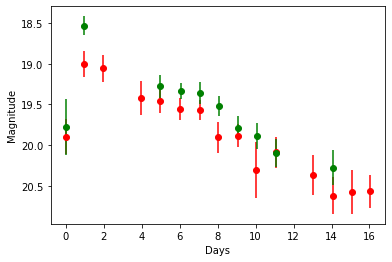

In [21]:
CV_1 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF19abppewc_20220603\\detections_ZTF19abppewc.csv")
plotname = CV_1
lightcurve = make_lightcurve(plotname)



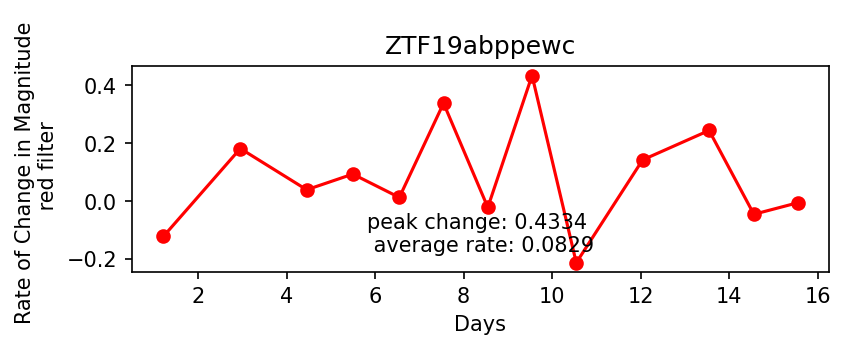

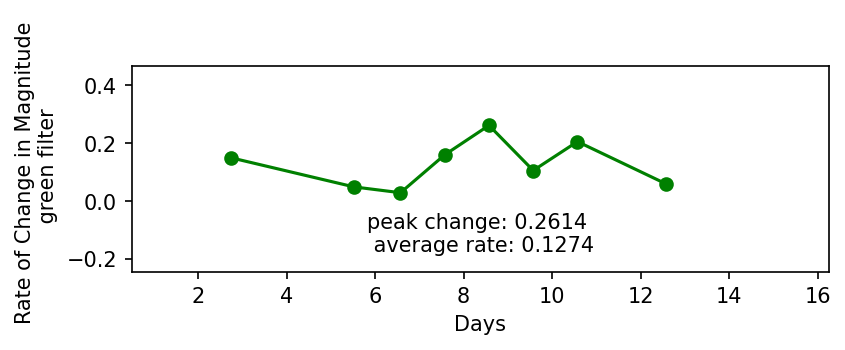

In [106]:
plotname = CV_1
objectname = 'ZTF19abppewc'
plot = plot_bothfilters(plotname, objectname)

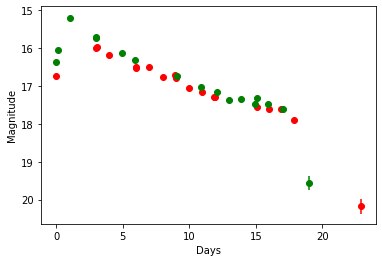

In [107]:
CV_4 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF20abzcokk_20220606\\detections_ZTF20abzcokk.csv")
plotname = CV_4
lightcurve = make_lightcurve(plotname)

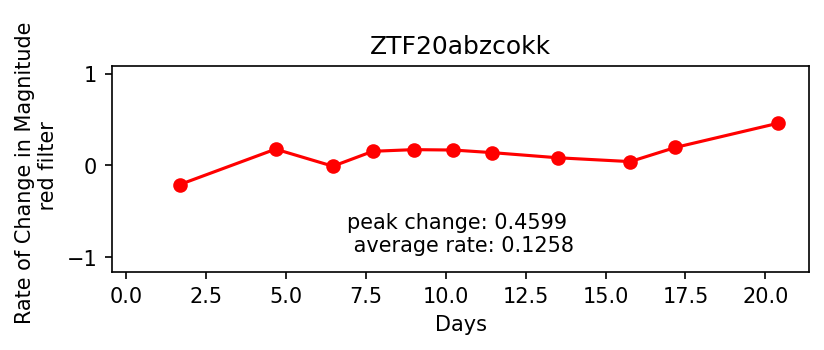

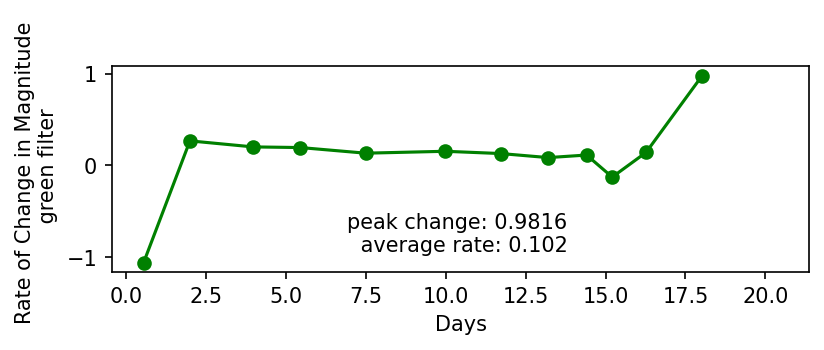

In [108]:
plotname = CV_4
objectname = 'ZTF20abzcokk'
plot = plot_bothfilters(plotname, objectname)

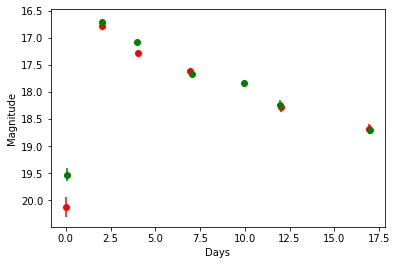

In [109]:
CV_5 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF21acaohjl_20220606\\detections_ZTF21acaohjl.csv")
plotname = CV_5
lightcurve = make_lightcurve(plotname)

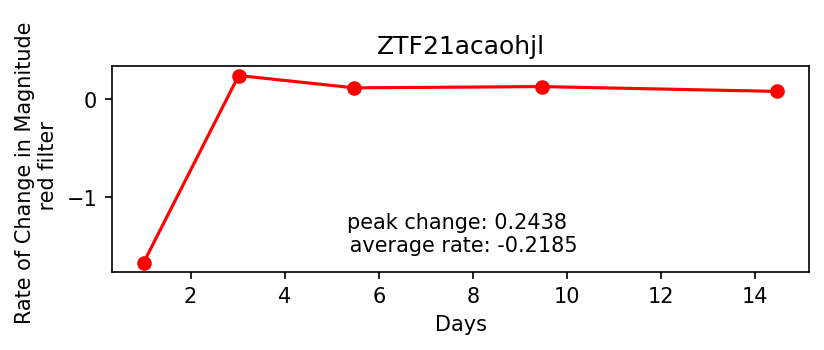

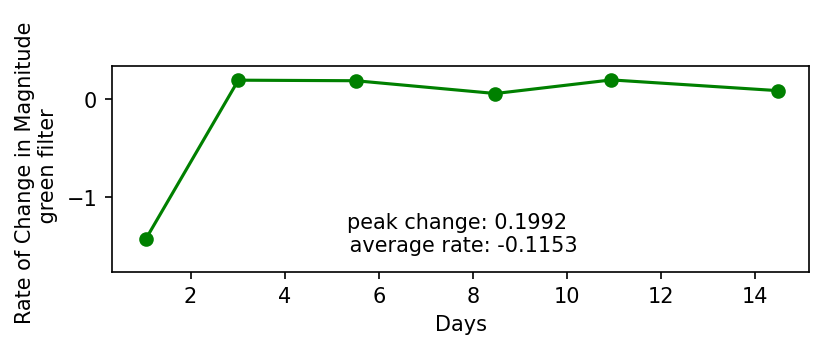

In [110]:
plotname = CV_5
objectname = 'ZTF21acaohjl'
plot = plot_bothfilters(plotname, objectname)

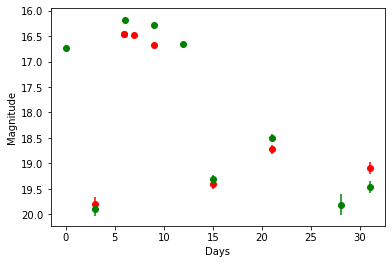

In [111]:
CV_7 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF20aawbodq_20220606\\detections_ZTF20aawbodq.csv")
plotname = CV_7
lightcurve = make_lightcurve(plotname)

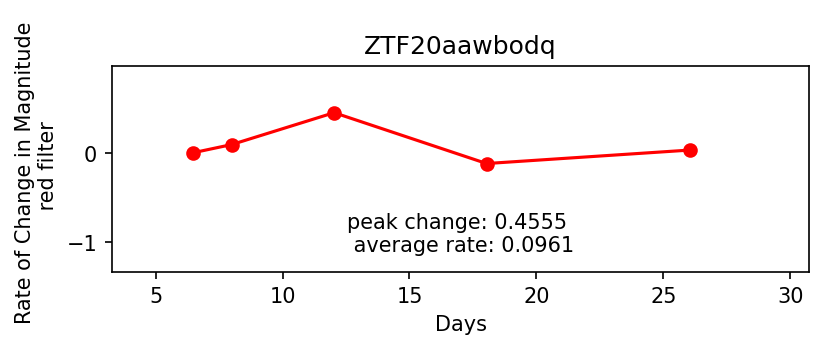

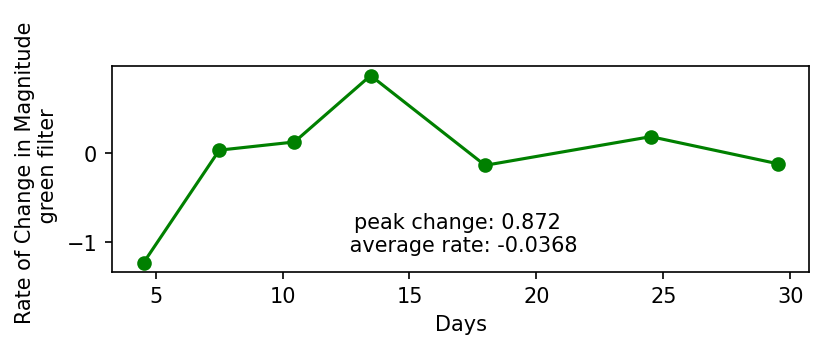

In [112]:
plotname = CV_7
objectname = 'ZTF20aawbodq'
plot = plot_bothfilters(plotname, objectname)

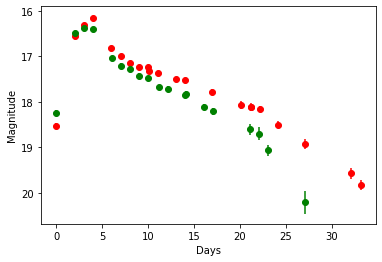

In [113]:
CV_8 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF19achbhfc_20220606\\detections_ZTF19achbhfc.csv")
plotname = CV_8
lightcurve = make_lightcurve(plotname)

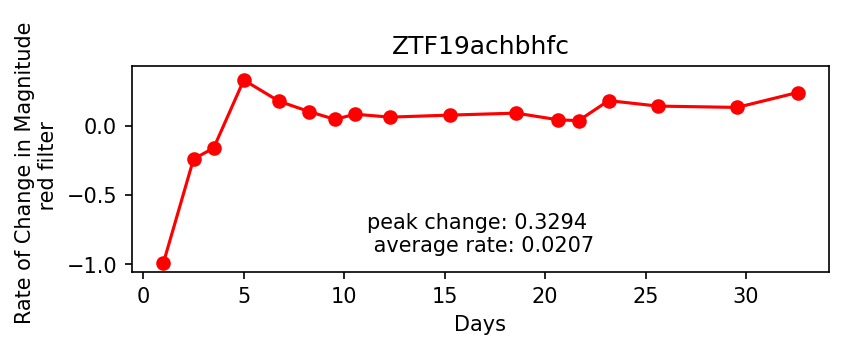

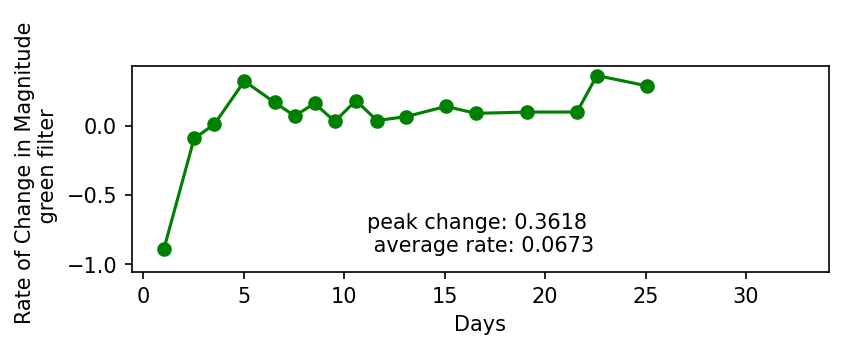

In [114]:
plotname = CV_8
objectname = 'ZTF19achbhfc'
plot = plot_bothfilters(plotname, objectname)

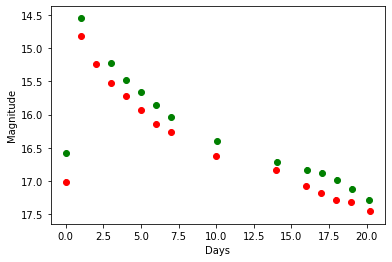

In [115]:
CV_9 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF19abzipjc_20220606\\detections_ZTF19abzipjc.csv")
plotname = CV_9
lightcurve = make_lightcurve(plotname)

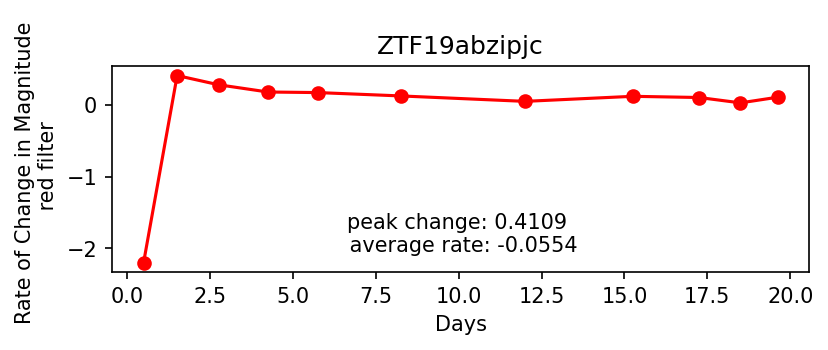

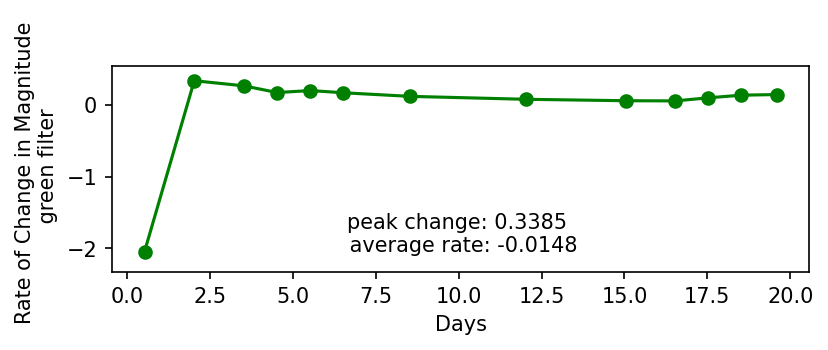

In [116]:
plotname = CV_9
objectname = 'ZTF19abzipjc'
plot = plot_bothfilters(plotname, objectname)

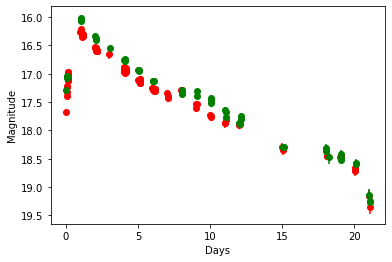

In [117]:
CV_10 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF19abyrano_20220606\\detections_ZTF19abyrano.csv")
plotname = CV_10
lightcurve = make_lightcurve(plotname)

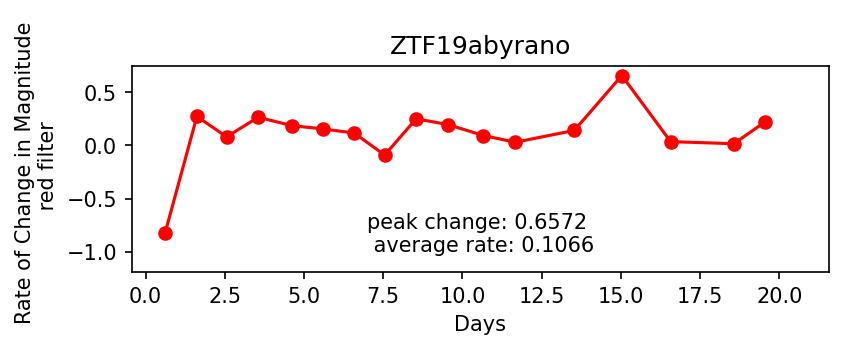

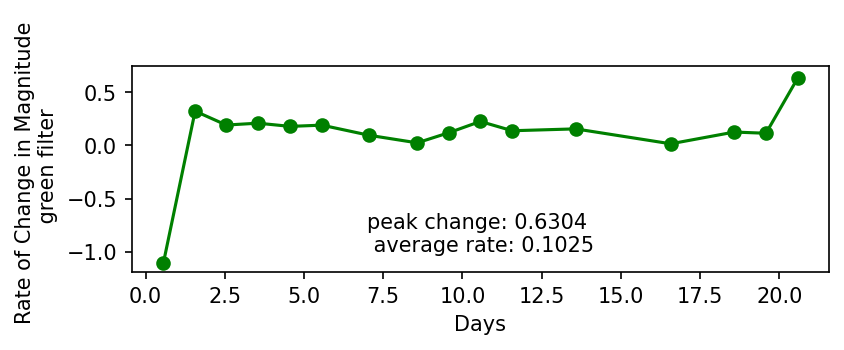

In [118]:
plotname = CV_10
objectname = 'ZTF19abyrano'
plot = plot_bothfilters(plotname, objectname)

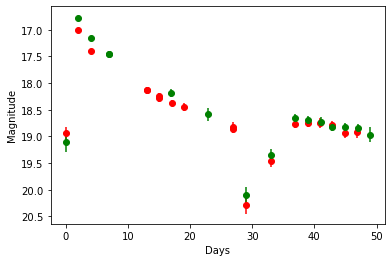

In [119]:
CV_11 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF22aahnvmo_20220616\\detections_ZTF22aahnvmo.csv")
plotname = CV_11
lightcurve = make_lightcurve(plotname)

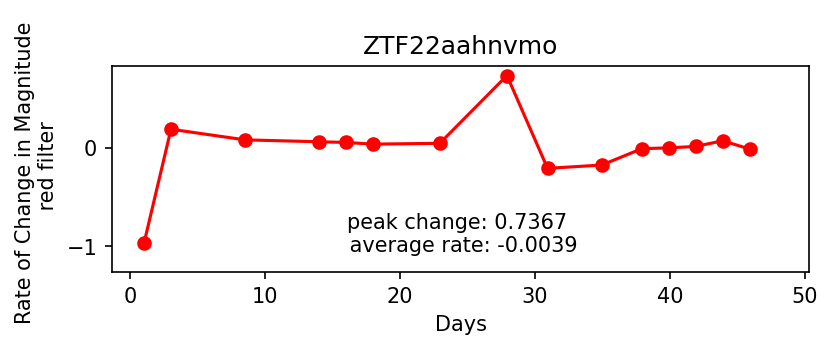

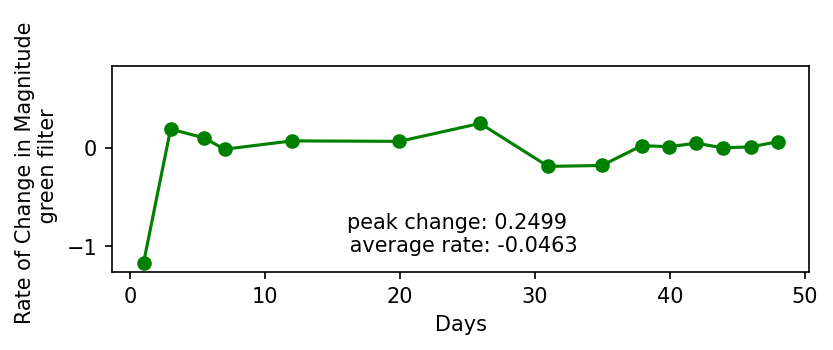

In [120]:
plotname = CV_11
objectname = 'ZTF22aahnvmo'
plot = plot_bothfilters(plotname, objectname)

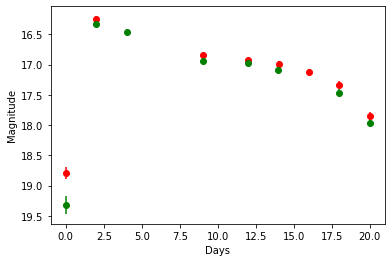

In [121]:
CV_12 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF22aakzsrj_20220616\\detections_ZTF22aakzsrj.csv")
plotname = CV_12
lightcurve = make_lightcurve(plotname)

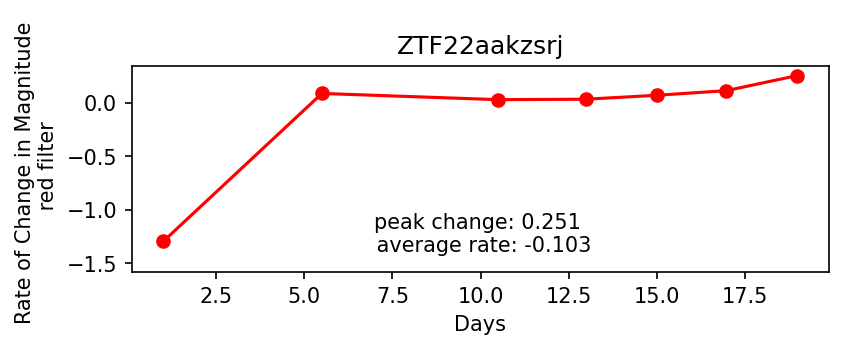

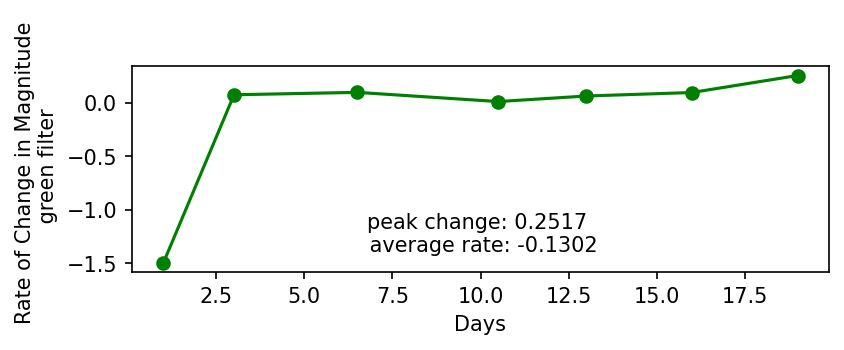

In [122]:
plotname = CV_12
objectname = 'ZTF22aakzsrj'
plot = plot_bothfilters(plotname, objectname)

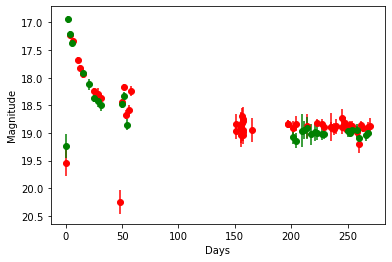

In [123]:
CV_13 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF21accyuff_20220616\\detections_ZTF21accyuff.csv")
plotname = CV_13
lightcurve = make_lightcurve(plotname)

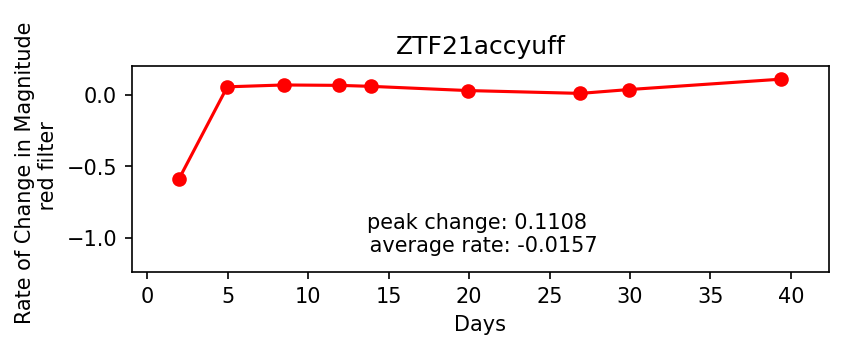

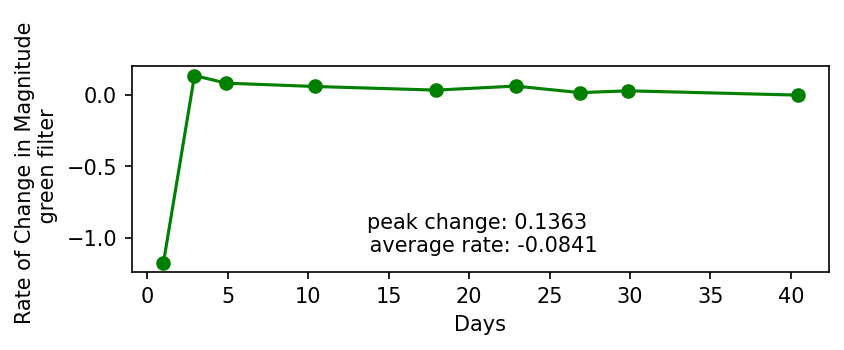

In [124]:
plotname = CV_13
objectname = 'ZTF21accyuff'
plot = plot_bothfilters(plotname, objectname)

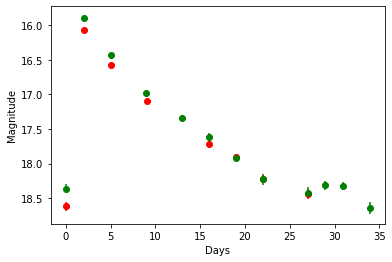

In [125]:
CV_14 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF21aazmjby_20220616\\detections_ZTF21aazmjby.csv")
plotname = CV_14
lightcurve = make_lightcurve(plotname)

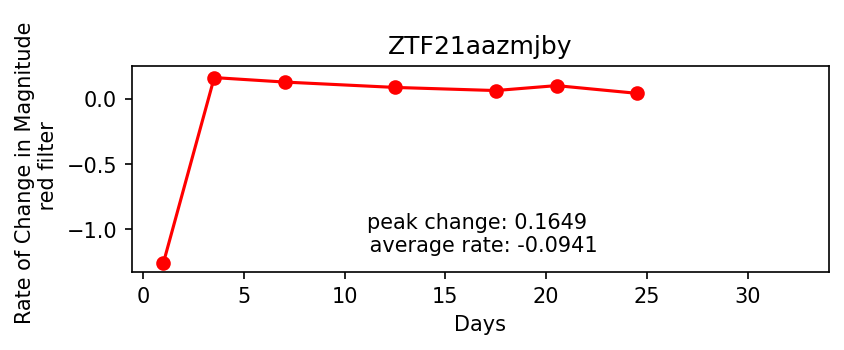

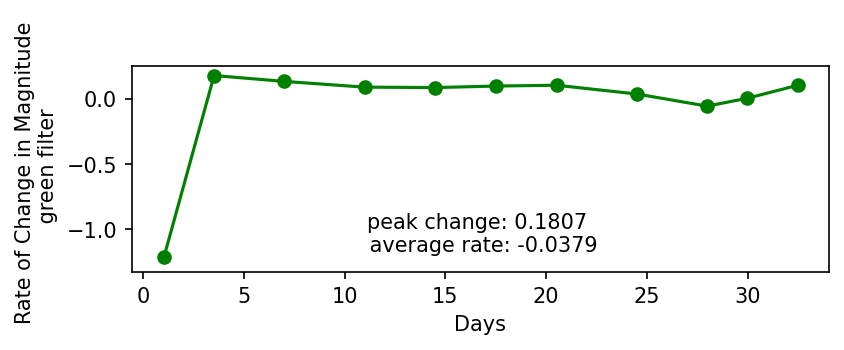

In [126]:
plotname = CV_14
objectname = 'ZTF21aazmjby'
plot = plot_bothfilters(plotname, objectname)

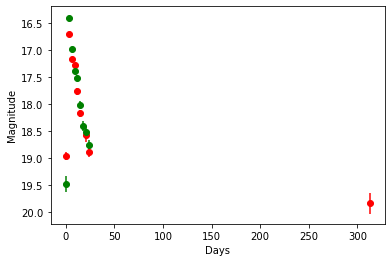

In [127]:
CV_15 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF18absnibc_20220616\\detections_ZTF18absnibc.csv")
plotname = CV_15
lightcurve = make_lightcurve(plotname)

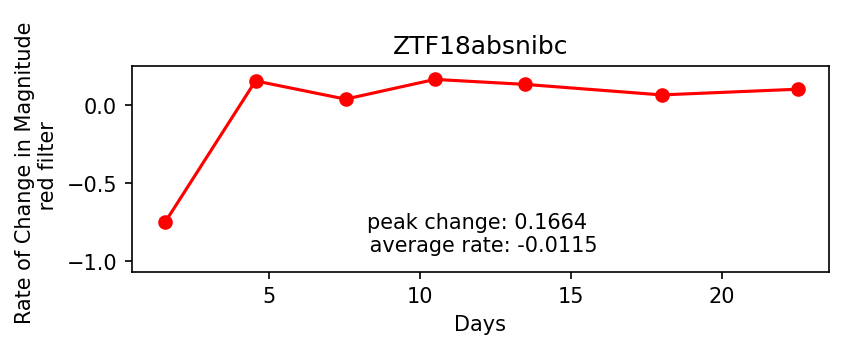

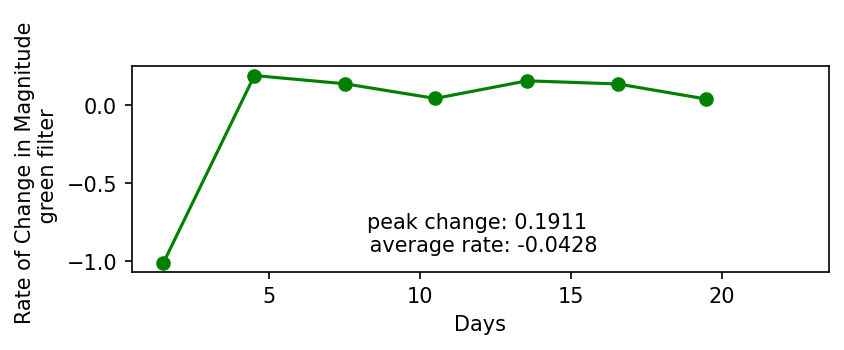

In [128]:
plotname = CV_15
objectname = 'ZTF18absnibc'
plot = plot_bothfilters(plotname, objectname)

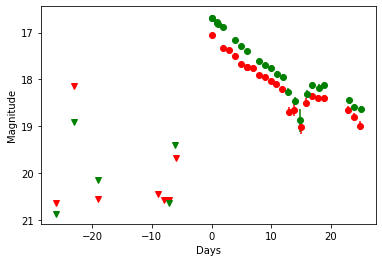

In [9]:
CV_18 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF20aavtaib_20220616\\detections_ZTF20aavtaib.csv")
ND_18 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF20aavtaib_20220616\\non_detections_ZTF20aavtaib.csv")
plotname = CV_18
non_detection = ND_18
lightcurve = make_lightcurve_withnd(plotname, non_detection)

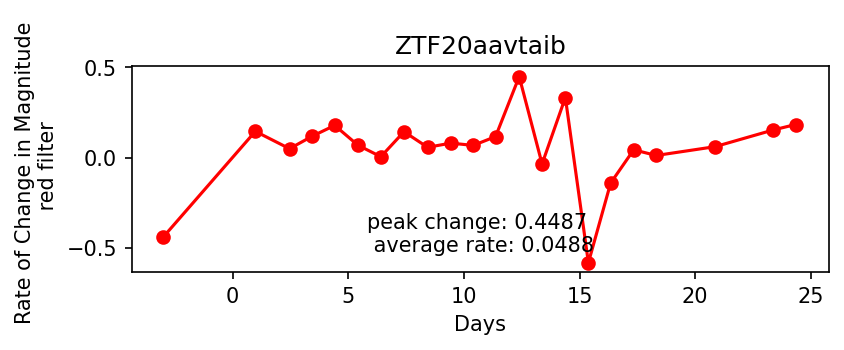

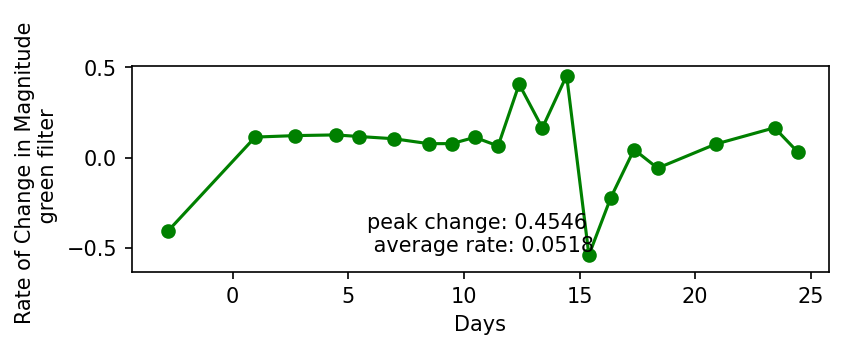

In [14]:
plotname = CV_18
objectname = 'ZTF20aavtaib'
plot_withnd(plotname, objectname)

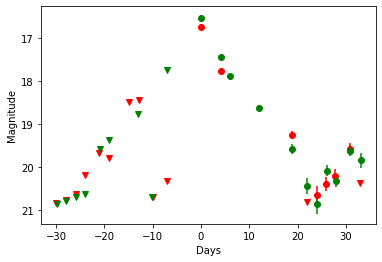

In [15]:
CV_19= pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF21acgrero_20220616\\detections_ZTF21acgrero.csv")
ND_19 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF21acgrero_20220616\\non_detections_ZTF21acgrero.csv")
plotname = CV_19
non_detection = ND_19
lightcurve = make_lightcurve_withnd(plotname, non_detection)

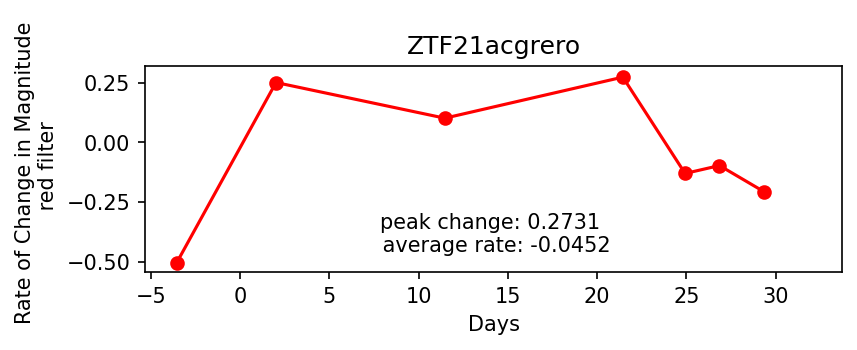

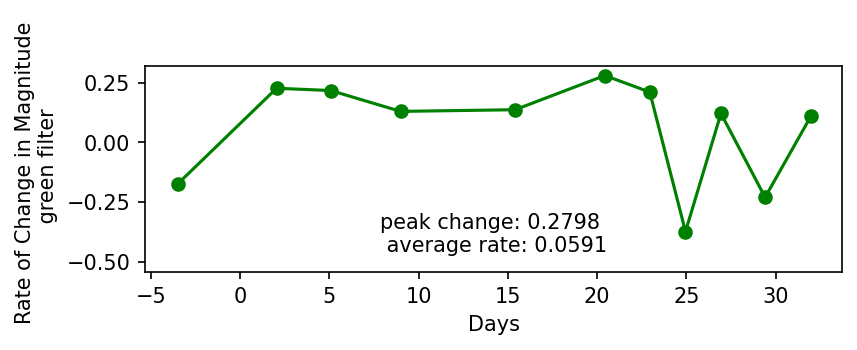

In [16]:
plotname = CV_19
objectname = 'ZTF21acgrero'
plot_withnd(plotname, objectname)

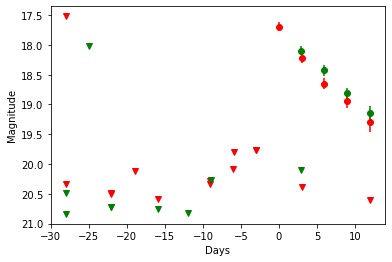

In [17]:
CV_20= pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF18abrxrms_20220616\\detections_ZTF18abrxrms.csv")
ND_20 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF18abrxrms_20220616\\non_detections_ZTF18abrxrms.csv")
plotname = CV_20
non_detection = ND_20
lightcurve = make_lightcurve_withnd(plotname, non_detection)

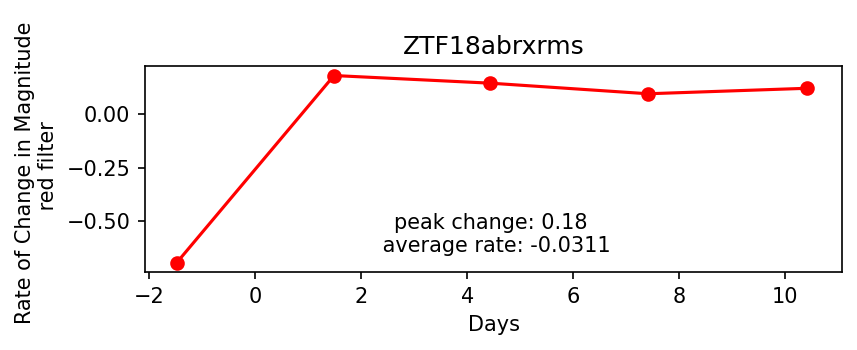

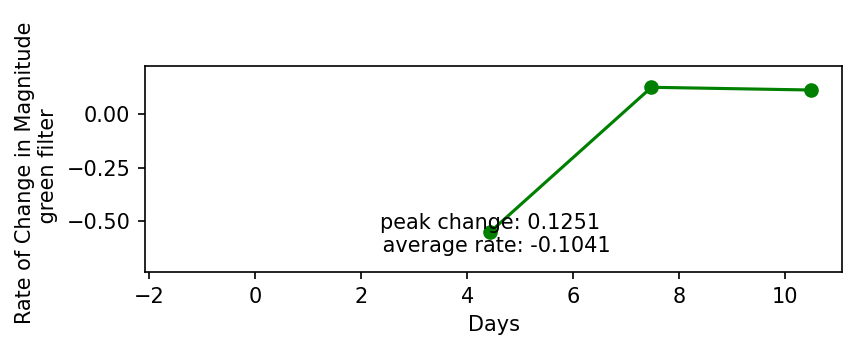

In [18]:
plotname = CV_20
objectname = 'ZTF18abrxrms'
plot_withnd(plotname, objectname)

In [23]:
def make_lightcurve_FBOT(plotname):
    red_points = plotname['Filter']=='r'
    green_points = plotname['Filter']=='g'
    plt.errorbar(plotname['Date'][red_points]-plotname['Date'][0], plotname['Mag'][red_points], plotname['Mag_err'][red_points], c='red', fmt='o')
    plt.errorbar(plotname['Date'][green_points]-plotname['Date'][0], plotname['Mag'][green_points], plotname['Mag_err'][green_points], c='green', fmt='o')
    plt.xlabel("Days")
    plt.ylabel("Magnitude")
    plt.gca().invert_yaxis()
    
def make_lightcurve_withnd_FBOT(plotname, non_detection):
    red_points = plotname['Filter']=='r'
    green_points = plotname['Filter']=='g'
    plt.errorbar(plotname['Date'][red_points]-plotname['Date'][0], plotname['Mag'][red_points], plotname['Mag_err'][red_points], c='red', fmt='o')
    plt.errorbar(plotname['Date'][green_points]-plotname['Date'][0], plotname['Mag'][green_points], plotname['Mag_err'][green_points], c='green', fmt='o')
   
    nd_red_points = non_detection['Filter']=='r'
    nd_green_points = non_detection['Filter']=='g'
    plt.errorbar(non_detection['Date'][nd_red_points]-plotname['Date'][0], non_detection['Mag'][nd_red_points], c='red', fmt='v')
    plt.errorbar(non_detection['Date'][nd_green_points]-plotname['Date'][0], non_detection['Mag'][nd_green_points], c='green', fmt='v')
    plt.xlabel("Days")
    plt.ylabel("Magnitude")
    plt.gca().invert_yaxis() 

In [19]:
def plot_bothfilters_FBOT(plotname, objectname):
    # red filter plot
    # defining red points
    red_points = plotname['Filter']=='r'
    x_vals = plotname['Date'][red_points].values-plotname['Date'][0]
    y_vals = plotname['Mag'][red_points].values
    x_vals = x_vals[starts[objectname]:ends[objectname]]
    y_vals = y_vals[starts[objectname]:ends[objectname]]
    y_error = y_error = plotname['Mag_err'][red_points]
    y_error = y_error[starts[objectname]:ends[objectname]]
    y_error = np.array(y_error)
    
    # convert magnitude into flux
    flux_values_red = 10**((y_vals+48.60)/-2.5)
    
    # find weighted average of magnitude per day (binning)
    flux_averages_red, time_averages_red = find_averages(x_vals, flux_values_red, y_error)
    
    # convert binned flux points back to magnitude
    mag_values_red = -2.5*np.log10(flux_averages_red)-48.60
    
    # find slope of binned light curve
    slope, time = find_derivative(time_averages_red, mag_values_red)
    
    avgslope = np.average(slope)
    avgslope = round(avgslope, 4)
    maxslope = np.max(slope)
    maxslope = round(maxslope, 4)
    # plot rate of change of magnitude over time 
    plt.figure(dpi=150)
    ax1 = plt.subplot(2,1,1)
    ax1.plot(time, slope, marker='o', color='red')
    
    # Adding text to plot
    ax1.set_xlabel("Days")
    ax1.set_ylabel(f'Rate of Change in Magnitude \n red filter')
    textstr = f'peak change: {maxslope} \n average rate: {avgslope}'
    ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)

    plt.title(objectname)
    
    #green filter plot
    # defining green points
    green_points = plotname['Filter']=='g'
    x_vals = plotname['Date'][green_points].values-plotname['Date'][0]
    y_vals = plotname['Mag'][green_points].values
    x_vals = x_vals[starts[objectname]:ends[objectname]]
    y_vals = y_vals[starts[objectname]:ends[objectname]]
    y_error = y_error = plotname['Mag_err'][green_points]
    y_error = y_error[starts[objectname]:ends[objectname]]
    y_error = np.array(y_error)
    
    # convert magnitude into flux
    flux_values_green = 10**((y_vals+48.60)/-2.5)
    
    # find weighted average of magnitude per day (binning)
    flux_averages_green, time_averages_green = find_averages(x_vals, flux_values_green, y_error)
    
    # convert binned flux points back to magnitude
    mag_values_green = -2.5*np.log10(flux_averages_green)-48.60
    
    # find slope of binned light curve
    slope, time = find_derivative(time_averages_green, mag_values_green)
    
    avgslope = np.average(slope)
    avgslope = round(avgslope, 4)
    maxslope = np.max(slope)
    maxslope = round(maxslope, 4)
    # plot rate of change of magnitude over time 
    plt.figure(dpi=150)
    ax2 = plt.subplot(2,1,2)
    ax2.plot(time, slope, marker='o', color='green')
    
    # Adding text to plot
    ax2.set_xlabel("Days")
    ax2.set_ylabel(f'Rate of Change in Magnitude \n green filter')
    textstr = f'peak change: {maxslope} \n average rate: {avgslope}'
    ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)
    
     #formatting axes
    ax1.get_shared_x_axes().join(ax1,ax2)
    ax1.get_shared_y_axes().join(ax1,ax2)
    plt.show()

In [32]:
def plot_withnd_FBOT(plotname, objectname):
    # red filter plot
    # defining red points
    red_points = plotname['Filter']=='r'
    
    x_vals = plotname['Date'][red_points].values-plotname['Date'][0]
    y_vals = plotname['Mag'][red_points].values
    y_error = y_error = plotname['Mag_err'][red_points]
    y_error = y_error[starts[objectname]:ends[objectname]]
    y_error = np.array(y_error)
    
    # including last non-detection before first detection
    nd_red_points = non_detection['Filter']=='r'
    nd_x_vals = non_detection['Date'][nd_red_points]-plotname['Date'][0]
    nd_y_vals = non_detection['Mag'][nd_red_points]
    
    x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)
    
    x_vals = x_vals[starts[objectname]:ends[objectname]]
    y_vals = y_vals[starts[objectname]:ends[objectname]]
    # convert magnitude into flux
    flux_values_red = 10**((y_sorted+48.60)/-2.5)
    
    # find weighted average of magnitude per day (binning)
    flux_averages_red, time_averages_red = find_averages(x_sorted, flux_values_red, y_error_sorted)
    
    # convert binned flux points back to magnitude
    mag_values_red = -2.5*np.log10(flux_averages_red)-48.60
    
    # find slope of binned light curve
    slope, time = find_derivative(time_averages_red, mag_values_red)
    
    avgslope = np.average(slope)
    avgslope = round(avgslope, 4)
    maxslope = np.max(slope)
    maxslope = round(maxslope, 4)
    # plot rate of change of magnitude over time 
    plt.figure(dpi=150)
    ax1 = plt.subplot(2,1,1)
    ax1.plot(time, slope, marker='o', color='red')
    
    # Adding text to plot
    ax1.set_xlabel("Days")
    ax1.set_ylabel(f'Rate of Change in Magnitude \n red filter')
    textstr = f'peak change: {maxslope} \n average rate: {avgslope}'
    ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)

    plt.title(objectname)
    
    #green filter plot
    # defining green points
    green_points = plotname['Filter']=='g'
    x_vals = plotname['Date'][green_points].values-plotname['Date'][0]
    y_vals = plotname['Mag'][green_points].values
    x_vals = x_vals[starts[objectname]:ends[objectname]]
    y_vals = y_vals[starts[objectname]:ends[objectname]]
    y_error = y_error = plotname['Mag_err'][green_points]
    y_error = y_error[starts[objectname]:ends[objectname]]
    y_error = np.array(y_error)
    
    # including last non-detection before first detection
    nd_green_points = non_detection['Filter']=='g'
    nd_x_vals = non_detection['Date'][nd_green_points]-plotname['Date'][0]
    nd_y_vals = non_detection['Mag'][nd_green_points]
    
    x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)
    
    avgslope = np.average(slope)
    avgslope = round(avgslope, 4)
    maxslope = np.max(slope)
    maxslope = round(maxslope, 4)
    # convert magnitude into flux
    flux_values_green = 10**((y_sorted+48.60)/-2.5)
    
    # find weighted average of magnitude per day (binning)
    flux_averages_green, time_averages_green = find_averages(x_sorted, flux_values_green, y_error_sorted)
    
    # convert binned flux points back to magnitude
    mag_values_green = -2.5*np.log10(flux_averages_green)-48.60
    
    # find slope of binned light curve
    slope, time = find_derivative(time_averages_green, mag_values_green)
    
    avgslope = np.average(slope)
    avgslope = round(avgslope, 4)
    maxslope = np.max(slope)
    maxslope = round(maxslope, 4)
    # plot rate of change of magnitude over time 
    plt.figure(dpi=150)
    ax2 = plt.subplot(2,1,2)
    ax2.plot(time, slope, marker='o', color='green')
    
    # Adding text to plot
    ax2.set_xlabel("Days")
    ax2.set_ylabel(f'Rate of Change in Magnitude \n green filter')
    textstr = f'peak change: {maxslope} \n average rate: {avgslope}'
    ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)
    
     #formatting axes
    ax1.get_shared_x_axes().join(ax1,ax2)
    ax1.get_shared_y_axes().join(ax1,ax2)
    plt.show()

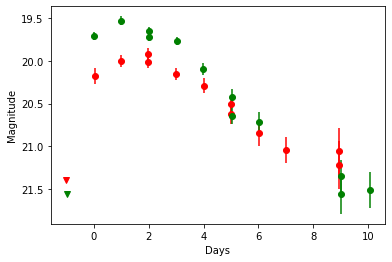

In [33]:
abv_detections = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF18abvkwla detections - Sheet1.csv")
abv_nd = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF18abvkwla non detections - Sheet1.csv")
plotname = abv_detections
non_detection = abv_nd
lightcurve = make_lightcurve_withnd_FBOT(plotname, non_detection)

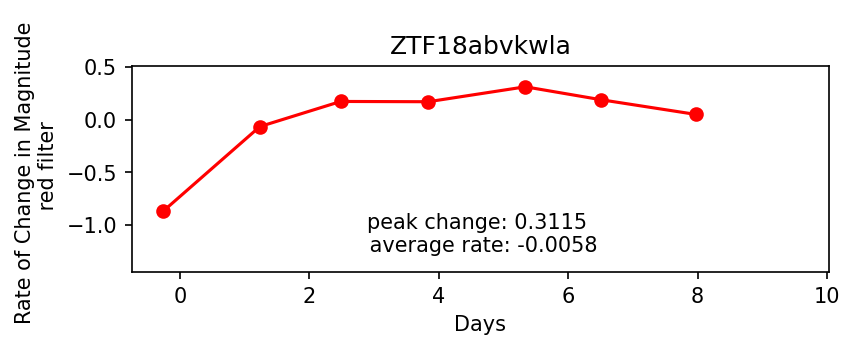

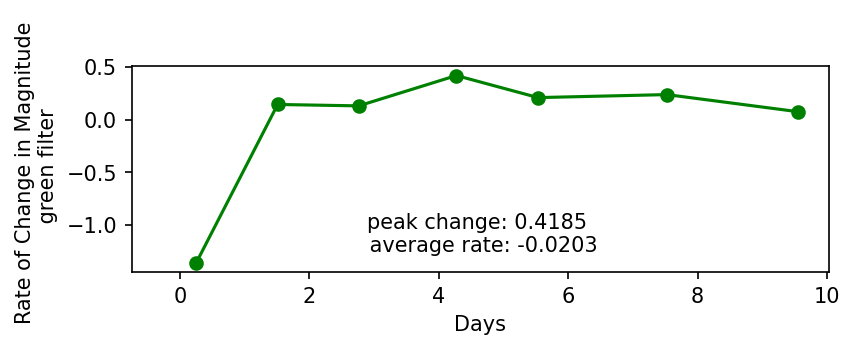

In [34]:
plotname = abv_detections
objectname = 'ZTF18abvkwla'
plot = plot_withnd_FBOT(plotname, objectname)

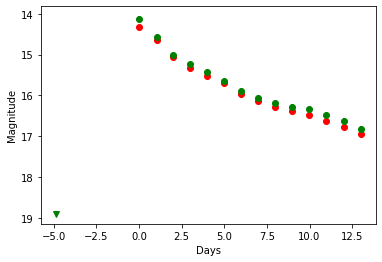

In [26]:
abc_detections = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF18abcfcoo detections - Sheet1.csv")
abc_nd = pd.read_csv('C:\\Users\\marya\\Downloads\\ZTF18abcfcoo non detections - Sheet1.csv')
plotname = abc_detections
non_detection = abc_nd
lightcurve = make_lightcurve_withnd_FBOT(plotname, non_detection)

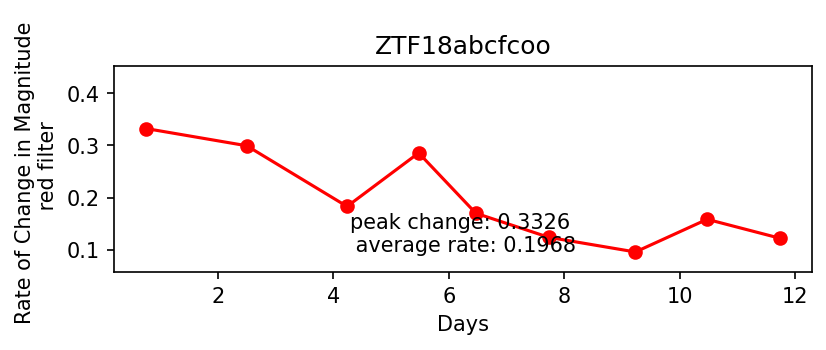

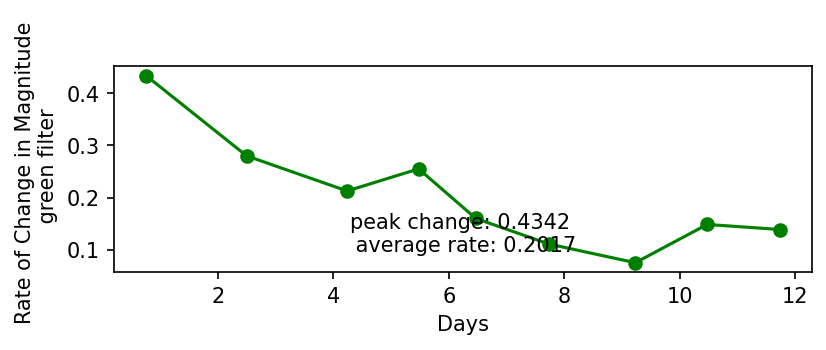

In [27]:
plotname = abc_detections
objectname = 'ZTF18abcfcoo'
plot = plot_bothfilters_FBOT(plotname, objectname)

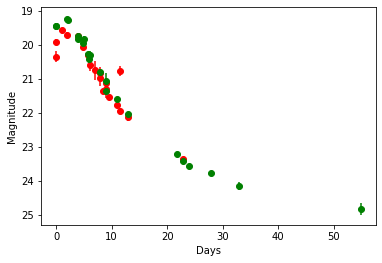

In [28]:
aci_detections = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF20acigmel detections - Sheet1.csv")
plotname = aci_detections
lightcurve = make_lightcurve_FBOT(plotname)

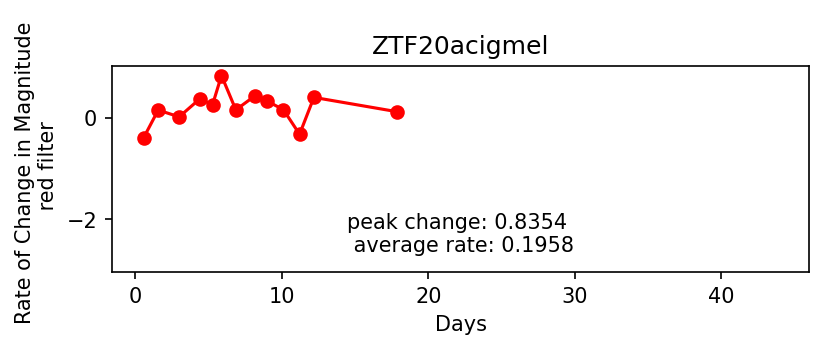

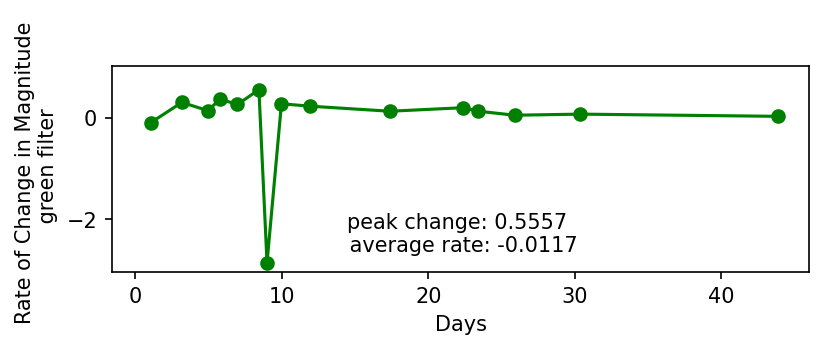

In [29]:
plotname = aci_detections
objectname = 'ZTF20acigmel'
plot = plot_bothfilters_FBOT(plotname, objectname)

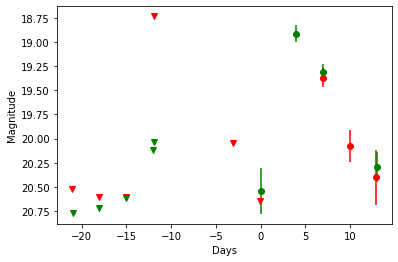

In [30]:
ET_4 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF20abfhyil_20220606\\detections_ZTF20abfhyil.csv")
ND_4 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF20abfhyil_20220606\\non_detections_ZTF20abfhyil.csv")

non_detection = ND_4
non_detection

plotname = ET_4
lightcurve = make_lightcurve_withnd(plotname, non_detection)

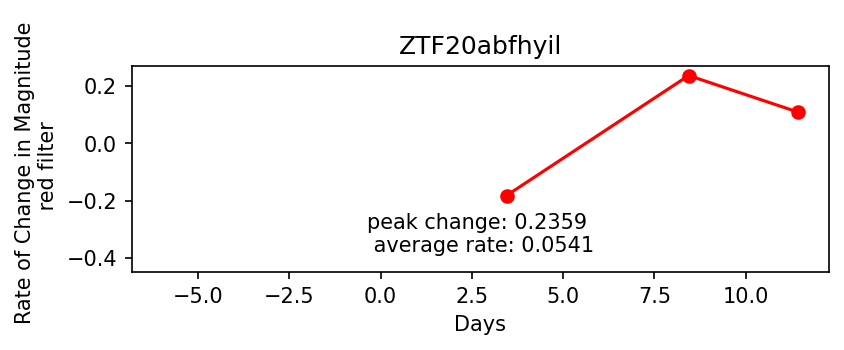

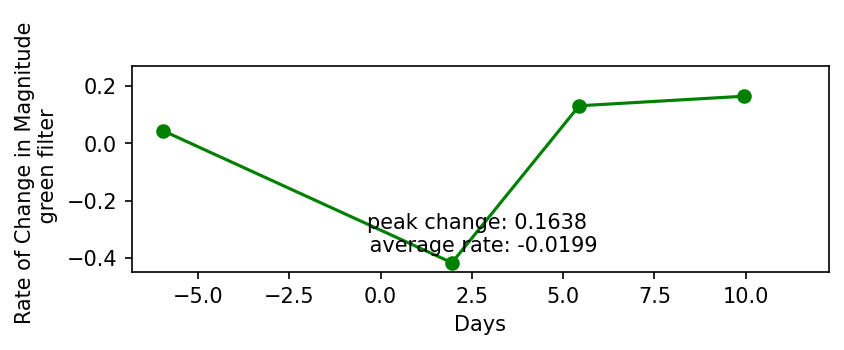

In [31]:
plotname = ET_4
objectname = 'ZTF20abfhyil'
plot_withnd(plotname, objectname)